## Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn
import toolkit
import mltoolkit

## Read in data

In [2]:
df = pd.read_hdf("/data/RSNA/dataframes/df_256.h5")
df.head(10)

,patientId,x,y,width,height,Target,class,image
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,"[[92, 50, 30, 17, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4..."
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,"[[20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,"[[18, 16, 15, 15, 14, 14, 13, 14, 14, 14, 14, ..."
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,"[[205, 202, 193, 192, 187, 185, 180, 179, 177,..."
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,"[[2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 4, 4, 5,..."
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity,"[[2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 4, 4, 5,..."
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,"[[1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,..."
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,"[[226, 163, 112, 81, 58, 39, 25, 19, 19, 19, 2..."
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,Lung Opacity,"[[44, 15, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ..."
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,Lung Opacity,"[[44, 15, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ..."


In [3]:
df.iloc[0]['image'].shape

(256, 256)

In [4]:
df_xy = df[['Target','image']]
#df_xy.columns = [['indexedLabel', 'features']]
df_xy['features'] = df_xy['image'].apply(lambda x: np.array(x).reshape(256*256))


/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Factor Analysis

In [3]:
df['features'] = df['image'].apply(lambda x: np.array(x).reshape(256*256))

# get feature data
x = np.array([f for f in df.features])
#subset_size = x.shape[0]//10
#x_sub = x[:subset_size]

# standardize features
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
#x
#x_mean = x.mean(axis=0)
#x_std = x.std(axis=0)
#x = [(xi-x_mean)/x_std for xi in x]
x

/opt/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 4.61266974e-01,  1.57051037e-03, -2.19286488e-01, ...,
        -8.15275150e-01, -7.68492006e-01, -6.80027299e-01],
       [-4.43839662e-01, -6.51297132e-01, -6.40621766e-01, ...,
         7.71180551e-01,  1.08060659e+00,  1.14798134e+00],
       [-4.68981513e-01, -4.51439690e-01, -4.29954127e-01, ...,
        -4.18661225e-01, -2.67984115e-01,  2.60469898e-01],
       ...,
       [-6.95258172e-01, -6.64620961e-01, -6.40621766e-01, ...,
        -8.86099065e-01, -9.07521976e-01, -9.18463208e-01],
       [-7.92828224e-02, -5.04735008e-01, -6.12532747e-01, ...,
         1.76271536e+00,  1.91478641e+00,  2.16795717e+00],
       [-6.82687247e-01, -6.51297132e-01, -6.40621766e-01, ...,
         2.75413144e-01,  9.34938059e-02, -3.48866314e-01]])

In [4]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=3, random_state=0)
x_3d = transformer.fit_transform(x)

In [5]:
labels = df.Target.values
#x_2d[labels == 0][:,1].shape

<IPython.core.display.Javascript object>


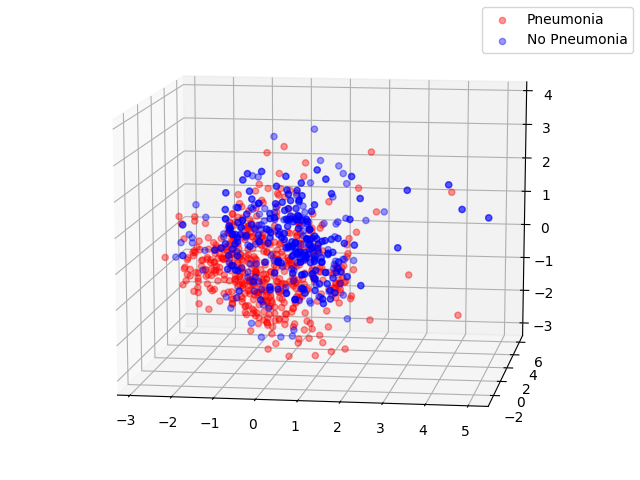

In [11]:
%matplotlib notebook


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#plt.scatter(x_2d[labels == 0][:,0], x_2d[labels == 0][:,1], c='red')
#plt.scatter(x_2d[labels == 1][:,0], x_2d[labels == 1][:,1], c='blue')

#plt.show()

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_3d[labels == 0][:500,0], x_3d[labels == 0][:500,1], x_3d[labels == 0][:500,2], label='Pneumonia', c='red', alpha=0.4)
ax.scatter(x_3d[labels == 1][:500,0], x_3d[labels == 1][:500,1], x_3d[labels == 1][:500,2], label='No Pneumonia', c='blue', alpha=0.4)

plt.legend()
plt.show()

In [23]:
class_label = df.iloc[:,6]
class_label = np.array([0 if c == 'Lung Opacity' else 1 if c == 'Normal' else 2 for c in class_label])

<IPython.core.display.Javascript object>


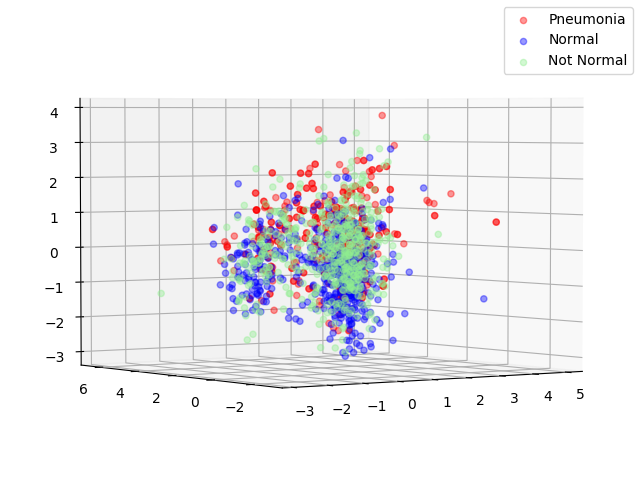

In [24]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_3d[class_label == 0][:500,0], x_3d[class_label == 0][:500,1], x_3d[class_label == 0][:500,2], label='Pneumonia', c='red', alpha=0.4)
ax.scatter(x_3d[class_label == 1][:500,0], x_3d[class_label == 1][:500,1], x_3d[class_label == 1][:500,2], label='Normal', c='blue', alpha=0.4)
ax.scatter(x_3d[class_label == 2][:500,0], x_3d[class_label == 2][:500,1], x_3d[class_label == 2][:500,2], label='Not Normal', c='lightgreen', alpha=0.4)


plt.legend()
plt.show()

## Random Forest Classifier

/opt/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



 Class	Train	Test

0	14079	5946

1	6213	2751

Total time taken: 54.04212689399719

Methods	RandomForestClassifier
AUC	0.8639175700167374
F Score	0.7056949422540821
Accuracy	0.8300563412671036
Precision	0.7802730074856892
Recall	0.6441294074881861
False Positive Rate	0.21972699251431088
True Positive Rate	0.847650171179583
	
Confusion Matrix
[0 1]
[[5447  499]
 [ 979 1772]]


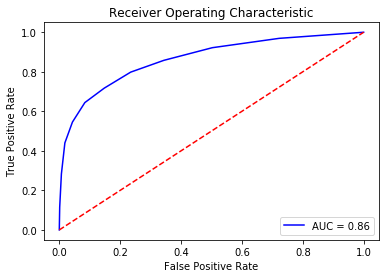

Sample predictions: 


,index,indexedLabel,image,features,predictions
0,26701,0,"[[2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...","[2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0
1,9993,0,"[[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0
2,28708,1,"[[163, 146, 126, 108, 92, 74, 61, 53, 55, 48, ...","[163, 146, 126, 108, 92, 74, 61, 53, 55, 48, 3...",1
3,20494,1,"[[3, 4, 6, 7, 8, 9, 10, 10, 154, 164, 166, 165...","[3, 4, 6, 7, 8, 9, 10, 10, 154, 164, 166, 165,...",1
4,18418,1,"[[240, 240, 239, 232, 227, 224, 223, 217, 213,...","[240, 240, 239, 232, 227, 224, 223, 217, 213, ...",1
5,1098,0,"[[7, 7, 7, 7, 6, 5, 5, 4, 4, 4, 5, 7, 17, 24, ...","[7, 7, 7, 7, 6, 5, 5, 4, 4, 4, 5, 7, 17, 24, 3...",0
6,21603,0,"[[77, 80, 83, 82, 85, 87, 87, 87, 89, 87, 86, ...","[77, 80, 83, 82, 85, 87, 87, 87, 89, 87, 86, 8...",1
7,24030,0,"[[3, 3, 3, 3, 4, 4, 14, 17, 21, 23, 26, 29, 34...","[3, 3, 3, 3, 4, 4, 14, 17, 21, 23, 26, 29, 34,...",0
8,7120,0,"[[4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...","[4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0
9,1856,0,"[[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0


In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
mcc = mltoolkit.MultiClassClassifier(clf, 'indexedLabel', testFraction=0.3)
matrics = mcc.fit(df_xy)
for k,v in matrics.items(): print(f"{k}\t{v}")

# Plot ROC 
mltoolkit.plot_roc(mcc.TPR, mcc.FPR, mcc.AUC)    

print("Sample predictions: ")
mcc.prediction.head(10)

In [10]:
df_sample = df_xy.sample(frac=0.3)

df_sample.groupby("indexedLabel").count()

,image,features
indexedLabel,,
0,5999,5999
1,2698,2698


## Logistic Regression Classifier


 Class	Train	Test

0	4213	1786

1	1874	824


/opt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Total time taken: 1257.0515360832214

Methods	LogisticRegression
AUC	0.7586215331760511
F Score	0.5670356703567037
Accuracy	0.7302681992337164
Precision	0.5748129675810474
Recall	0.5594660194174758
False Positive Rate	0.4251870324189526
True Positive Rate	0.7992256637168141
	
Confusion Matrix
[0 1]
[[1445  341]
 [ 363  461]]


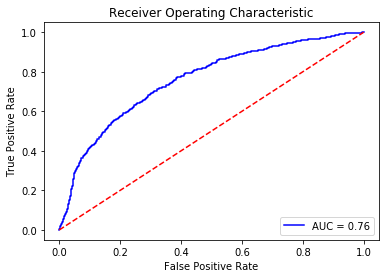

Sample predictions: 


,index,indexedLabel,image,features,predictions
0,17297,1,"[[13, 9, 7, 7, 7, 7, 9, 11, 12, 12, 13, 12, 11...","[13, 9, 7, 7, 7, 7, 9, 11, 12, 12, 13, 12, 11,...",0
1,6733,0,"[[239, 180, 137, 107, 89, 70, 54, 50, 52, 53, ...","[239, 180, 137, 107, 89, 70, 54, 50, 52, 53, 5...",0
2,8606,1,"[[175, 107, 15, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[175, 107, 15, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2...",0
3,1948,1,"[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",1
4,4887,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
5,3600,1,"[[4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...","[4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",1
6,6754,1,"[[126, 124, 122, 121, 119, 119, 118, 117, 116,...","[126, 124, 122, 121, 119, 119, 118, 117, 116, ...",1
7,13482,1,"[[4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,...","[4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",1
8,25026,0,"[[21, 16, 13, 13, 12, 12, 13, 13, 12, 13, 13, ...","[21, 16, 13, 13, 12, 12, 13, 13, 12, 13, 13, 1...",0
9,18016,1,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
mcc = mltoolkit.MultiClassClassifier(clf, 'indexedLabel', testFraction=0.3)
matrics = mcc.fit(df_sample)
for k,v in matrics.items(): print(f"{k}\t{v}")
    
# Plot ROC 
mltoolkit.plot_roc(mcc.TPR, mcc.FPR, mcc.AUC)
    
print("Sample predictions: ")
mcc.prediction.head(10)

# Liblinear < more effient way to implement logistic regression. 

## SVM Classifier


 Class	Train	Test

0	4195	1804

1	1892	806


/opt/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Total time taken: 17890.74663066864

Methods	SVC
AUC	0.5818858560794045
F Score	0.2814498933901919
Accuracy	0.7417624521072796
Precision	1.0
Recall	0.16377171215880892
False Positive Rate	0.0
True Positive Rate	0.7280064568200162
	
Confusion Matrix
[0 1]
[[1804    0]
 [ 674  132]]


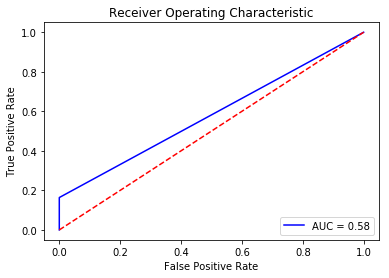

Sample predictions: 


,index,indexedLabel,image,features,predictions
0,27843,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,14398,0,"[[0, 1, 14, 14, 14, 14, 13, 13, 13, 13, 12, 12...","[0, 1, 14, 14, 14, 14, 13, 13, 13, 13, 12, 12,...",0
2,18193,1,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, ...",0
3,1423,0,"[[94, 80, 74, 70, 69, 66, 65, 62, 60, 58, 57, ...","[94, 80, 74, 70, 69, 66, 65, 62, 60, 58, 57, 5...",0
4,25378,0,"[[5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...","[5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0
5,12165,1,"[[9, 12, 15, 17, 23, 31, 39, 49, 51, 50, 47, 4...","[9, 12, 15, 17, 23, 31, 39, 49, 51, 50, 47, 42...",0
6,15235,1,"[[21, 25, 20, 16, 13, 12, 9, 8, 7, 6, 5, 4, 5,...","[21, 25, 20, 16, 13, 12, 9, 8, 7, 6, 5, 4, 5, ...",0
7,1019,0,"[[5, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
8,28419,0,"[[254, 251, 249, 244, 241, 239, 235, 233, 233,...","[254, 251, 249, 244, 241, 239, 235, 233, 233, ...",0
9,28369,0,"[[157, 153, 150, 140, 136, 124, 74, 21, 1, 1, ...","[157, 153, 150, 140, 136, 124, 74, 21, 1, 1, 0...",0


In [12]:
from sklearn.svm import SVC

# default as rbf kernel
clf = SVC(probability=True)

mcc = mltoolkit.MultiClassClassifier(clf, 'indexedLabel', testFraction=0.3)
matrics = mcc.fit(df_sample)
for k,v in matrics.items(): print(f"{k}\t{v}")
    
# Plot ROC 
mltoolkit.plot_roc(mcc.TPR, mcc.FPR, mcc.AUC)
    
print("Sample predictions: ")
mcc.prediction.head(10)

## Simple Multilayer Perception Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

layers = [featureCount, 32, 32, classCount]
clf = MLPClassifier(solver='sgd', \
                    alpha=1e-5, \
                    hidden_layer_sizes = (32, 32))
mcc = mltoolkit.MultiClassClassifier(clf, 'indexedLabel', testFraction=0.3)

matrics = mcc.fit(df_xy)
for k,v in matrics.items(): print(f"{k}\t{v}")
    
# Plot ROC 
mltoolkit.plot_roc(mcc.TPR, mcc.FPR, mcc.AUC)
    
print("Sample predictions: ")
mcc.prediction.head(10)